In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# # Importing skfuzzy from sklearn package
!pip install -U scikit-fuzzy
import skfuzzy as fuzz

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=8bd14bf4378dae8922fd74e883e92a148e85e88abc6891159ddb2311b524c584
  Stored in directory: c:\users\kate\appdata\local\pip\cache\wheels\2c\04\80\7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [9, 6]]

In [5]:
#Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

In [14]:
# Generate test data
np.random.seed(42) # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
        xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
        ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
        labels = np.hstack((labels, np.ones(200) * i))

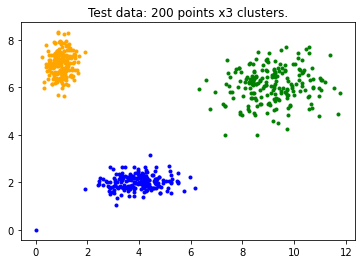

In [25]:
#Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
     ax0.plot(xpts[labels == label], ypts[labels == label], '.',
              color=colors[label])

ax0.set_title('Test data: 200 points x3 clusters.')
plt.show()

[[0.         4.39737132 3.88938856 ... 9.70492715 8.37170311 9.62984106]
 [0.         2.10733621 2.16823536 ... 6.38674297 6.15673989 6.9548983 ]]


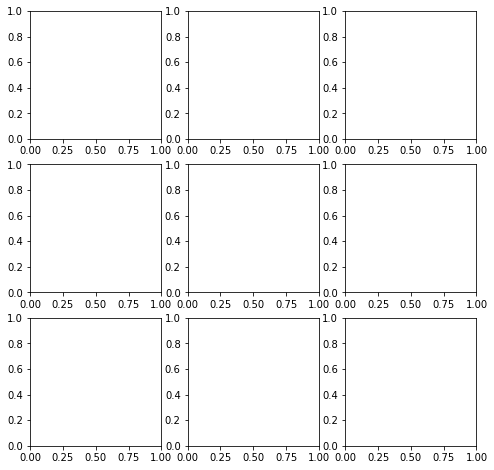

In [24]:
# Call the Fuzzy c-means function and train the data. Here we vary the cluster center from 2 to 10
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []
print (alldata)

In [26]:
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)
    
    # Store fpc values for later
    fpcs.append(fpc)
    print(u)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j], ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')
        
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
plt.show()

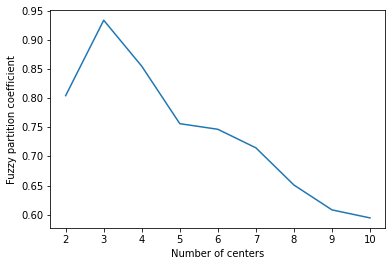

In [21]:
# Plot the Fuzzy partition Coefficient (FPC) by varying the number of the centers.
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")
plt.show()